In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('../final_merged_output.csv')
chicago = df[df['City'] == 'Chicago']
chicago.tail()

,City,Year,Quarter,index_nsa,Median Household Income,Total Population,INDPRO,VIXCLS,CPI,Unemployment Rate,City GDP
137,Chicago,2024,2,263.06,NaN,NaN,102.863300,13.980308,2.949511,5.233333,NaN
138,Chicago,2024,3,267.53,NaN,NaN,102.711400,17.066667,2.949511,5.500000,NaN
139,Chicago,2024,4,268.26,NaN,NaN,102.402933,17.319848,2.949511,4.700000,NaN
140,Chicago,2025,1,272.71,NaN,NaN,103.462667,18.507344,NaN,5.233333,NaN
141,Chicago,2025,2,280.14,NaN,NaN,103.843900,23.687154,NaN,4.700000,NaN


In [56]:
# No normalization

Mean Absolute Error (MAE): 5.1298
Root Mean Squared Error (RMSE): 7.4833
R² Score: -0.6466

Detailed Predictions:

     Year  Quarter  Actual_index_nsa  Predicted_index_nsa  Percent_Difference
128  2022        1            221.00           235.388766            6.510754
129  2022        2            234.20           235.803742            0.684774
130  2022        3            235.88           236.703959            0.349313
131  2022        4            232.43           236.132719            1.593047


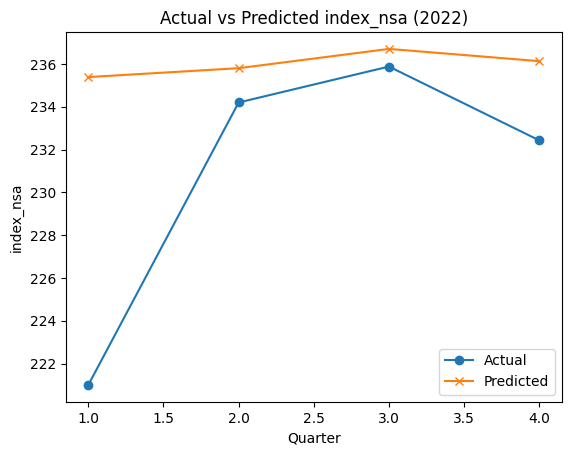

In [57]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Train on 1990–2021, test on 2022
train_df = chicago[chicago['Year'] <= 2021]
test_df = chicago[chicago['Year'] == 2022]

# Define features and target
X_train = train_df.drop(columns=['index_nsa', 'City'])
y_train = train_df['index_nsa']
X_test = test_df.drop(columns=['index_nsa', 'City'])
y_test = test_df['index_nsa'] if 'index_nsa' in test_df else None  # safeguard

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict for 2022
y_pred_2022 = model.predict(X_test)

# Combine predictions with test data
predictions_2022 = test_df.copy()
predictions_2022['Predicted_index_nsa'] = y_pred_2022

# If actual 2022 values exist, compute percent difference and validation metrics
if y_test is not None:
    predictions_2022['Actual_index_nsa'] = y_test.values
    predictions_2022['Percent_Difference'] = (
        abs(predictions_2022['Predicted_index_nsa'] - predictions_2022['Actual_index_nsa'])
        / predictions_2022['Actual_index_nsa'] * 100
    )

    # Compute evaluation metrics
    mae = mean_absolute_error(y_test, y_pred_2022)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred_2022))
    r2 = r2_score(y_test, y_pred_2022)

    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"R² Score: {r2:.4f}")
    print("\nDetailed Predictions:\n")
else:
    print("No actual 2022 index_nsa values available for validation.\n")

# Show detailed predictions
print(predictions_2022[['Year', 'Quarter', 'Actual_index_nsa', 'Predicted_index_nsa', 'Percent_Difference']])

# Optional: Plot actual vs predicted for 2022
if y_test is not None:
    plt.plot(predictions_2022['Quarter'], predictions_2022['Actual_index_nsa'], label='Actual', marker='o')
    plt.plot(predictions_2022['Quarter'], predictions_2022['Predicted_index_nsa'], label='Predicted', marker='x')
    plt.xlabel('Quarter')
    plt.ylabel('index_nsa')
    plt.title('Actual vs Predicted index_nsa (2022)')
    plt.legend()
    plt.show()


In [35]:
# Min-max normalization

Model Performance on 2022 Data (Trained on 2021):
Mean Absolute Error (MAE): 65.4627
Root Mean Squared Error (RMSE): 76.8541
R² Score: -172.6718
Average Percent Difference: 28.10%

🔍 Detailed Predictions:

     Year  Quarter  Actual_index_nsa  Predicted_index_nsa  Percent_Difference
128  2022        1            221.00           238.269878            7.814424
129  2022        2            234.20           275.219328           17.514657
130  2022        3            235.88           316.134756           34.023553
131  2022        4            232.43           355.736651           53.051091


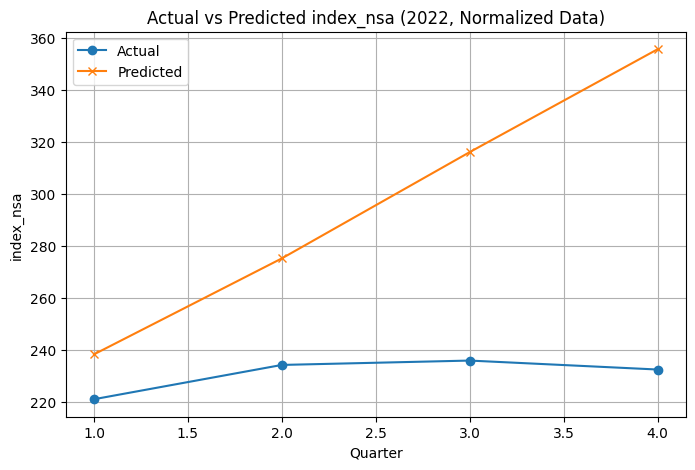

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Split into train (2021) and test (2022)
train_df = chicago[chicago['Year'] == 2021]
test_df = chicago[chicago['Year'] == 2022]

# Define features and target
X_train = train_df.drop(columns=['index_nsa', 'City'])
y_train = train_df['index_nsa']
X_test = test_df.drop(columns=['index_nsa', 'City'])
y_test = test_df['index_nsa']

# Normalize features (fit on train, transform both)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predict for 2022
y_pred_2022 = model.predict(X_test_scaled)

# Combine predictions with test data
predictions_2022 = test_df.copy()
predictions_2022['Predicted_index_nsa'] = y_pred_2022
predictions_2022['Actual_index_nsa'] = y_test.values

# Compute percent difference
predictions_2022['Percent_Difference'] = (
    abs(predictions_2022['Predicted_index_nsa'] - predictions_2022['Actual_index_nsa'])
    / predictions_2022['Actual_index_nsa'] * 100
)

# Compute evaluation metrics
mae = mean_absolute_error(y_test, y_pred_2022)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_2022))
r2 = r2_score(y_test, y_pred_2022)
avg_percent_diff = predictions_2022['Percent_Difference'].mean()

# Display metrics
print(f"Model Performance on 2022 Data (Trained on 2021):")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"Average Percent Difference: {avg_percent_diff:.2f}%\n")

# Show detailed predictions
print("🔍 Detailed Predictions:\n")
print(predictions_2022[['Year', 'Quarter', 'Actual_index_nsa', 'Predicted_index_nsa', 'Percent_Difference']])

# Plot Actual vs Predicted for 2022
plt.figure(figsize=(8,5))
plt.plot(predictions_2022['Quarter'], predictions_2022['Actual_index_nsa'], label='Actual', marker='o')
plt.plot(predictions_2022['Quarter'], predictions_2022['Predicted_index_nsa'], label='Predicted', marker='x')
plt.xlabel('Quarter')
plt.ylabel('index_nsa')
plt.title('Actual vs Predicted index_nsa (2022, Normalized Data)')
plt.legend()
plt.grid(True)
plt.show()


In [36]:
# Z-score Normalization

Model Evaluation (Test Year 2022):
Mean Absolute Error (MAE): 5.130
R² Score: -0.647

     Year  Quarter  index_nsa  Predicted_index_nsa  Percent_Difference
128  2022        1     221.00           235.388766            6.510754
129  2022        2     234.20           235.803742            0.684774
130  2022        3     235.88           236.703959            0.349313
131  2022        4     232.43           236.132719            1.593047


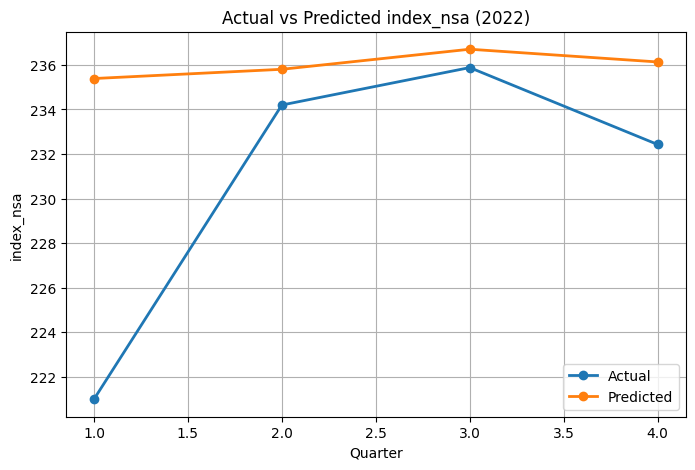

In [34]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Split into train (1990–2021) and test (2022)
train_df = chicago[chicago['Year'] <= 2021]
test_df = chicago[chicago['Year'] == 2022]

# Define features and target
X_train = train_df.drop(columns=['index_nsa', 'City'])
y_train = train_df['index_nsa']
X_test = test_df.drop(columns=['index_nsa', 'City'])
y_test = test_df['index_nsa']

# Normalize (z-score normalization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predict for 2022
y_pred_2022 = model.predict(X_test_scaled)

# Combine predictions with test data
predictions_2022 = test_df.copy()
predictions_2022['Predicted_index_nsa'] = y_pred_2022
predictions_2022['Percent_Difference'] = ((y_pred_2022 - y_test) / y_test) * 100

# Evaluate performance
mae = mean_absolute_error(y_test, y_pred_2022)
r2 = r2_score(y_test, y_pred_2022)

print("Model Evaluation (Test Year 2022):")
print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"R² Score: {r2:.3f}\n")
print(predictions_2022[['Year', 'Quarter', 'index_nsa', 'Predicted_index_nsa', 'Percent_Difference']])

# Plot actual vs predicted values
plt.figure(figsize=(8, 5))
plt.plot(predictions_2022['Quarter'], y_test, marker='o', label='Actual', linewidth=2)
plt.plot(predictions_2022['Quarter'], y_pred_2022, marker='o', label='Predicted', linewidth=2)
plt.title("Actual vs Predicted index_nsa (2022)")
plt.xlabel("Quarter")
plt.ylabel("index_nsa")
plt.legend()
plt.grid(True)
plt.show()
